# Simple scenario

## Introduction

This notebook demonstrates how to set up, execute, and analyze a scenario using the Hamlet tool. Hamlet simplifies simulation processes for energy system scenarios. In this tutorial, we walk through a basic scenario, explaining the required input files and demonstrating the scenario lifecycle.

### Required Files

The scenario setup uses the following files:
- **YAML files:** Define configuration for agents (`agents.yaml`), grids (`grids.yaml`), markets (`markets.yaml`), and scenario setup (`setup.yaml`).
- **Excel files:** Contain structured data for agents (`agents.xlsx`).

All files are placed in a structured folder (`simple_scenario`). Its name will automatically be used for the scenario name (unless overwritten).

In [12]:
from hamlet import Creator, Executor, Analyzer

## Step 1: Scenario Creation

This step generates the scenario based on YAML and Excel configurations.

In [13]:
# Path to the scenario configuration folder
name = "simple_scenario"
path_configs = f"./{name}"

In [14]:
# Instantiate Creator and generate the scenario
creator = Creator(path=path_configs)
creator.new_scenario_from_configs()



Successfully created scenario: 100%|██████████| 9/9 [14:29<00:00, 96.56s/it]


  0%|          | 0/9 [00:00<?, ?it/s]

Creating the missing agent files::   0%|          | 0/9 [00:00<?, ?it/s]

Creating the missing agent files: simple_scenario:   0%|          | 0/9 [00:00<?, ?it/s]

Creating the missing agent files: simple_scenario:  11%|█         | 1/9 [00:00<00:05,  1.48it/s]

Creating the missing agent files::  11%|█         | 1/9 [00:00<00:05,  1.48it/s]                

Creating the missing grid files::  11%|█         | 1/9 [00:00<00:05,  1.48it/s] 

Creating the missing grid files: simple_scenario:  11%|█         | 1/9 [00:00<00:05,  1.48it/s]

Creating the missing grid files::  22%|██▏       | 2/9 [00:00<00:04,  1.48it/s]                

Creating the folders for the scenario::  22%|██▏       | 2/9 [00:00<00:04,  1.48it/s]

Creating the folders for the scenario::  33%|███▎      | 3/9 [00:00<00:01,  4.58it/s]

Creating the markets for each region::  33%|███▎      | 3/9 [00:00<00:

**Alternative Creation Methods:**
- `creator.new_scenario_from_grids()`: Create a scenario from the electricity grid file (see example "single_market_with_grid")
- `creator.new_scenario_from_files()`: Create a scenario from the agent.xlsx file instead of the agent.yaml file. This allows you to fine-tune a scenario before creating a scenario from it.

## Step 2: Scenario Execution

Execute the scenario created previously. Hamlet runs the defined scenario and produces results.

The `num_workers` parameter defines how many CPU cores to use for simulation. It is set to one to not call multiprocessing. To use multiprocessing you need to call it from a python file using the following command:

```python

if __name__ == "__main__":
    sim = Executor(path)
    sim.run()


In [15]:
# Path to the scenario created
path_scenario = f"../../scenarios/{name}"

In [16]:
# Instantiate Executor and run the simulation
executor = Executor(path_scenario, num_workers=1)
executor.run()

Simulation finished: 100%|██████████| 24/24 [01:17<00:00,  3.54s/it]                                                           

## Step 3: Scenario Analysis

Analyze and visualize the results obtained from scenario execution.

The analysis provides visual insights into scenario outcomes, which helps understand scenario dynamics and performance.

In [17]:
# Path to simulation results (you can add multiple results for plots that compare different scenarios)
path_results = {name: f"../../results/{name}"}

In [18]:
# Create the analyzer object
sim = Analyzer(path_results)

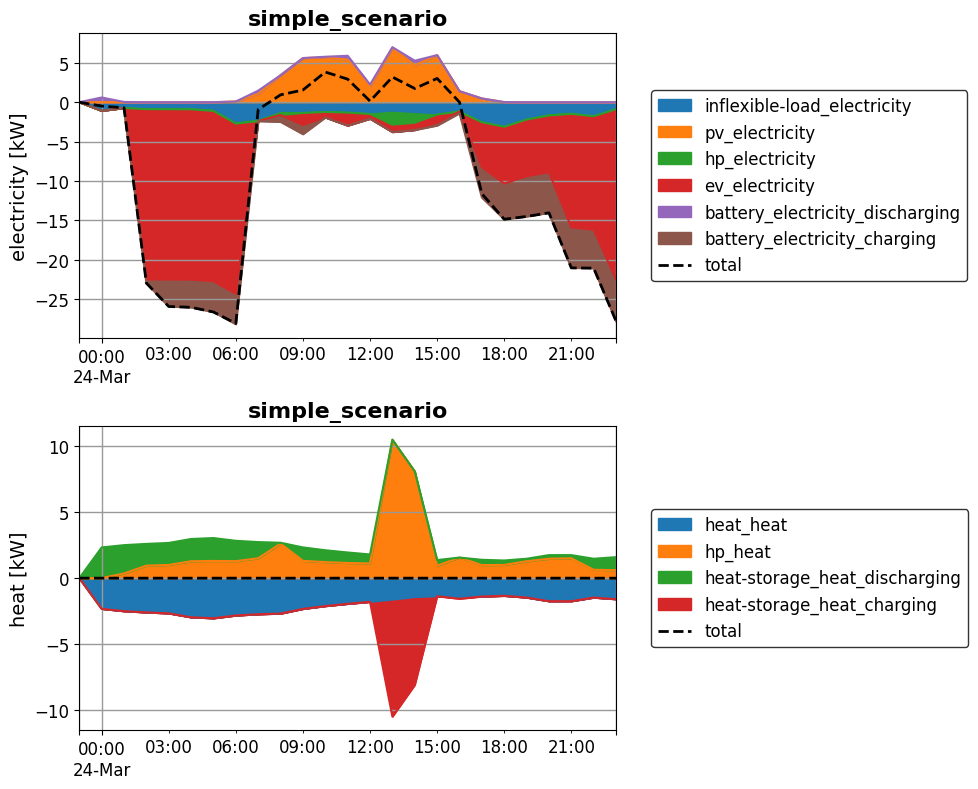

<function hamlet.analyzer.agents.agent_plotter.AgentPlotter.plot_all_meters_data(self, **kwargs)>

In [19]:
# Plot all meters data for the agents, i.e. when was energy produced and consumed
sim.agents.plot_all_meters_data(save_path=None)  # save_path is None by default

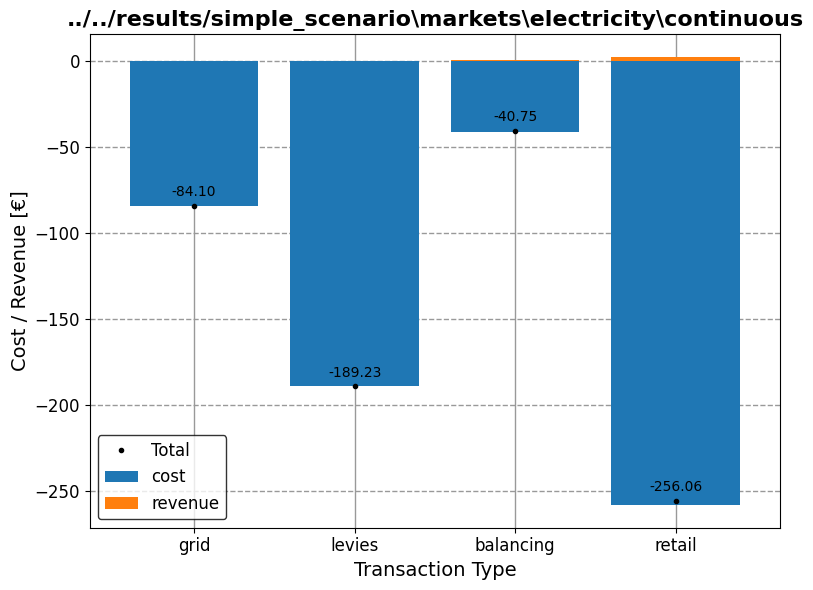

<function hamlet.analyzer.markets.market_plotter.MarketPlotter.plot_total_balancing(self, **kwargs)>

In [22]:
# Plot the total costs and revenues of each energy price component
sim.markets.plot_total_balancing()